In [ ]:
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving labeled_data.csv to labeled_data.csv


In [ ]:
data = pd.read_csv("labeled_data.csv")
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
data = data[["tweet", "class"]]
data.groupby('class')['class'].agg('count').values


array([ 1430, 19190,  4163])

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [ ]:
minority_len=len(data[data["class"] == 0])
majority_len=len(data[data["class"]== 1])
majority_len_2=len(data[data["class"]== 2])
#store the indices of majority and minority class
minority_indices=data[data["class"] == 0].index
majority_indices=data[data["class"] == 1].index
majority_indices_2=data[data["class"] == 2].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
random_majority_indices_2=np.random.choice(
    majority_indices_2,
    size=minority_len,
    replace=False
)

#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
undersampled_indices=np.concatenate([undersampled_indices,random_majority_indices_2])

#create df using new indices
df=data.loc[undersampled_indices]

#shuffle the sample
df=df.sample(frac=1)

#reset the index as its all mixed
df=df.reset_index()

#drop the older index
df=df.drop(
    columns=["index"],
)

In [ ]:
balance_counts = df.groupby('class')['class'].agg('count').values
balance_counts

array([1430, 1430, 1430])

In [ ]:
!pip install neattext
import neattext as nt
import neattext.functions as nfx


df['tweet_clean'] = df['tweet'].apply(nfx.remove_userhandles)
df['tweet_clean'] = df['tweet_clean'].apply(nfx.remove_hashtags)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
df.head()

,tweet,class,tweet_clean
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...


In [ ]:
df = df.dropna(how="any", axis=1)
df.columns = ['tweet', 'target', "message"]

df.head()

,tweet,target,message
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...


In [ ]:
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))
df.head()

,tweet,target,message,message_len
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...,17
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...,29
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...,19
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...,19
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...,22


In [ ]:
max(df['message_len'])

38

In [ ]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['message_clean'] = df['message'].apply(clean_text)
df.head()

,tweet,target,message,message_len,message_clean
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...,17,okay im only going to say it once comb yer b...
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...,29,rt chava needs to stay in his lane and keep ...
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...,19,movies dont matter as long as you do coon ...
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...,19,i hopes dis aint cause he colored cause i k...
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...,22,where the fuck is your top lip in my ...


In [ ]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')


stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,target,message,message_len,message_clean
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...,17,okay going say comb yer beards
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...,29,rt chava needs stay lane keep sending gyro h...
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...,19,movies dont matter long coon shit coons yo...
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...,19,hopes dis aint cause colored cause knows ac...
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...,22,fuck top lip pussy


In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
df['message_clean'] = df['message_clean'].apply(stemm_text)
df.head()

,tweet,target,message,message_len,message_clean
0,#Natitude? Okay. I'm only going to say it once...,2,Okay. I'm only going to say it once. COMB ye...,17,okay go say comb yer beard
1,RT @Buckm00se: chava needs to stay in his lane...,0,RT chava needs to stay in his lane and keep ...,29,rt chava need stay lane keep send gyro hell ...
2,@EleyCome_EleyGo @caykelly16 movies don't matt...,0,movies don't matter as long as you do coon...,19,movi dont matter long coon shit coon your ...
3,@kmdk83 @BeautifulMined\nI hopes dis ain't cau...,0,\nI hopes dis ain't cause he colored cause ...,19,hope dis aint caus color caus know actin ni...
4,&#8220;@blyth33s: &#8220;@chaserojo: .. where ...,1,& & .. where the fuck is your top lip http...,22,fuck top lip pussi


In [ ]:
target_categorical=to_categorical(df['target'], num_classes = 3, dtype='float32')

In [ ]:
texts = df['message_clean']

In [ ]:
from sklearn import metrics


In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6290

In [ ]:
nltk.download('punkt')
import tensorflow as tf
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = tf.keras.utils.pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


array([[ 351,   19,   30, ...,    0,    0,    0],
       [   1, 2760,   45, ...,    0,    0,    0],
       [ 404,    9,  522, ...,    0,    0,    0],
       ...,
       [   1,   19,   61, ...,    0,    0,    0],
       [  16,   28,   99, ...,    0,    0,    0],
       [2745,  235,  390, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target_categorical, random_state=43
)


In [ ]:
def get_rnn_model():
    model = Sequential()

    model.add(Embedding(vocab_length, 100, input_length=length_long_sentence))
    model.add(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    return model


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=1,
    verbose=1)

callbacks = [reduce_lr, early_stopping]

In [ ]:
reduce_lr_1 = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)

In [ ]:
model1 = get_rnn_model()

In [ ]:
model1.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.shape

(3217, 3)

In [ ]:
X_train.shape

(3217, 23)

In [ ]:
history1 = model1.fit(
    X_train, 
    y_train, 
    epochs = 10,
    batch_size = 32,
    validation_split=0.2,
    verbose = 1,
    callbacks = callbacks
)


Epoch 1/10
81/81 [==============================] - 10s 90ms/step - loss: 1.1191 - accuracy: 0.3712 - val_loss: 1.0979 - val_accuracy: 0.3199 - lr: 0.0010
Epoch 2/10
81/81 [==============================] - 8s 98ms/step - loss: 1.0309 - accuracy: 0.4396 - val_loss: 1.0843 - val_accuracy: 0.5947 - lr: 0.0010
Epoch 3/10
81/81 [==============================] - 8s 94ms/step - loss: 0.9276 - accuracy: 0.5527 - val_loss: 1.0278 - val_accuracy: 0.6475 - lr: 0.0010
Epoch 4/10
81/81 [==============================] - 7s 87ms/step - loss: 0.7799 - accuracy: 0.6506 - val_loss: 0.9313 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/10
81/81 [==============================] - 8s 95ms/step - loss: 0.6701 - accuracy: 0.7198 - val_loss: 0.7920 - val_accuracy: 0.7562 - lr: 0.0010
Epoch 6/10
81/81 [==============================] - 8s 95ms/step - loss: 0.5870 - accuracy: 0.7699 - val_loss: 0.6670 - val_accuracy: 0.7624 - lr: 0.0010
Epoch 7/10
81/81 [==============================] - 7s 87ms/step - loss: 0.

In [ ]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

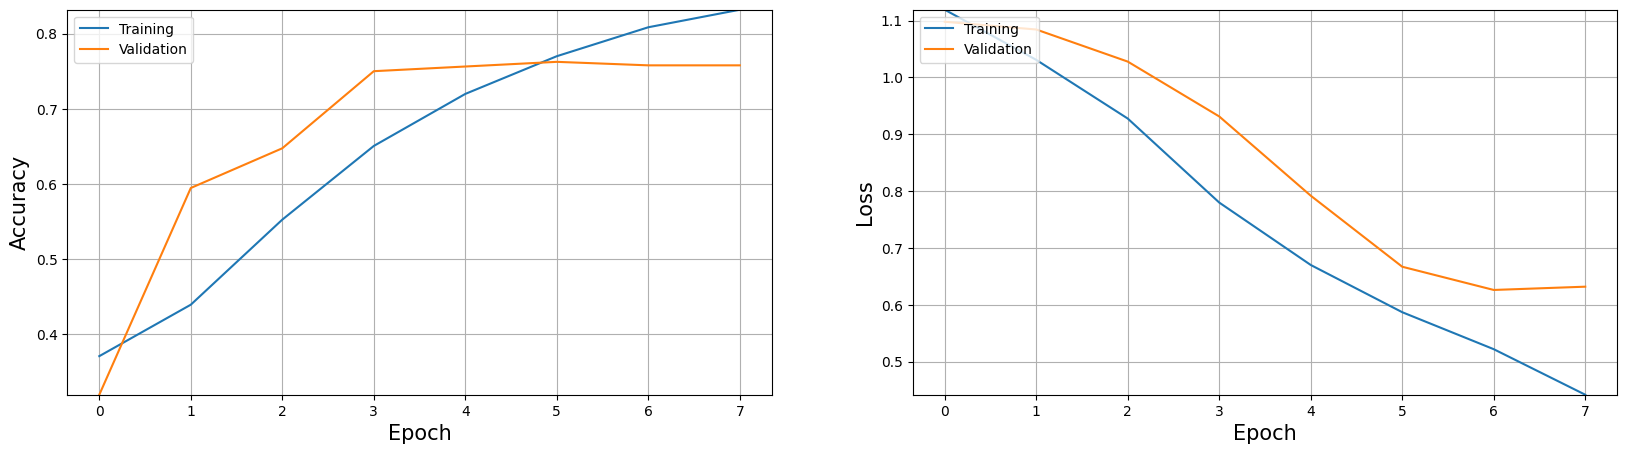

In [ ]:
plot_performance(history=history1)

In [ ]:
def get_cnn_model():   
    model = Sequential()
    
    model.add(Embedding(vocab_length, 50, input_length=length_long_sentence))
    
    model.add(Conv1D(64, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(3, activation='softmax'))
    
    model.summary()
    return model

In [ ]:
model2 = get_cnn_model()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 23, 50)            314500    
                                                                 
 conv1d (Conv1D)             (None, 21, 64)            9664      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 64)               

In [ ]:
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics="accuracy")

verbose = 1
epochs = 15
batch_size = 32
validation_split = 0.2

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split
    )

Trainning Model ...

Epoch 1/15
81/81 [==============================] - 8s 14ms/step - loss: 1.8598 - accuracy: 0.3389 - val_loss: 1.0968 - val_accuracy: 0.3292 - lr: 0.0010
Epoch 2/15
81/81 [==============================] - 1s 6ms/step - loss: 1.5148 - accuracy: 0.3921 - val_loss: 1.0680 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 3/15
81/81 [==============================] - 0s 6ms/step - loss: 1.3152 - accuracy: 0.4174 - val_loss: 1.0224 - val_accuracy: 0.4581 - lr: 0.0010
Epoch 4/15
81/81 [==============================] - 1s 6ms/step - loss: 1.1061 - accuracy: 0.4998 - val_loss: 0.9543 - val_accuracy: 0.6134 - lr: 0.0010
Epoch 5/15
81/81 [==============================] - 1s 6ms/step - loss: 0.9544 - accuracy: 0.5538 - val_loss: 0.8751 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 6/15
81/81 [==============================] - 0s 6ms/step - loss: 0.8397 - accuracy: 0.6059 - val_loss: 0.7767 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 7/15
81/81 [==============================] - 0s 6ms/s

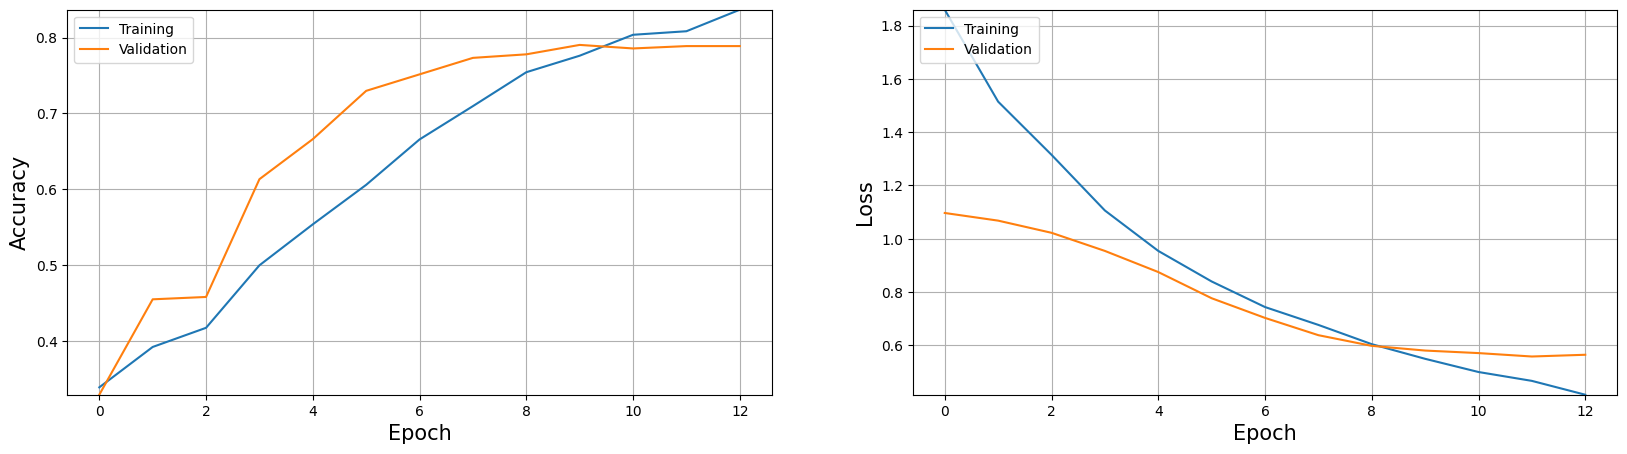

In [ ]:
plot_performance(history=history2)

In [ ]:
accuracy1 = model1.evaluate(X_test, y_test)
accuracy2 = model2.evaluate(X_test, y_test )

34/34 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7661


In [ ]:
print("Model Performance of LSTM (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of CNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of LSTM (Test Accuracy):
Accuracy: 75.21%
Loss: 0.669


Model Performance of CNN (Test Accuracy):
Accuracy: 76.61%
Loss: 0.599



In [ ]:
y_preds1 = (model1.predict(X_test) > 0.5).astype("int32")
y_preds2 = (model2.predict(X_test) > 0.5).astype("int32")


34/34 [==============================] - 0s 2ms/step


In [ ]:
from sklearn import metrics
print("accurancy score " + str(metrics.accuracy_score(y_test, y_preds1)))
print("precision score " + str(metrics.precision_score(y_test, y_preds1, average=None)))
print("recall " + str(metrics.recall_score(y_test, y_preds1, average=None)))
print("f1-score " + str(metrics.f1_score(y_test, y_preds1, average=None)))

accurancy score 0.6943150046598322
precision score [0.77818182 0.80428135 0.79525223]
recall [0.62209302 0.71081081 0.74651811]
f1-score [0.6914378  0.75466284 0.77011494]


In [ ]:
print("accurancy score " + str(metrics.accuracy_score(y_test, y_preds2)))
print("precision score " + str(metrics.precision_score(y_test, y_preds2, average=None)))
print("recall " + str(metrics.recall_score(y_test, y_preds2, average=None)))
print("f1-score " + str(metrics.f1_score(y_test, y_preds2, average=None)))

accurancy score 0.7437092264678472
precision score [0.72755418 0.82926829 0.81741573]
recall [0.68313953 0.73513514 0.81058496]
f1-score [0.70464768 0.77936963 0.81398601]


Text(50.722222222222214, 0.5, 'True label')

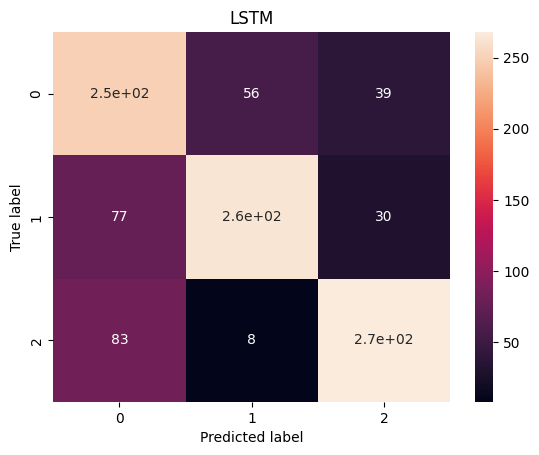

In [ ]:
xlabel = "Predicted label"
ylabel = "True label"
plt.title('LSTM')
cm = confusion_matrix(
    y_test.argmax(axis=1), y_preds1.argmax(axis=1))
sns.heatmap(cm, annot=True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

Text(50.722222222222214, 0.5, 'True label')

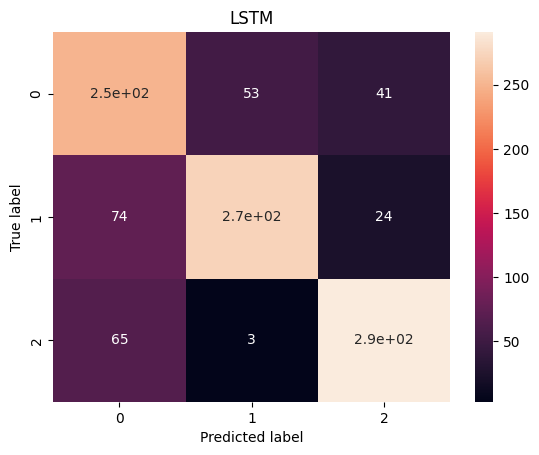

In [ ]:
xlabel = "Predicted label"
ylabel = "True label"
plt.title('LSTM')
cm = confusion_matrix(
    y_test.argmax(axis=1), y_preds2.argmax(axis=1))
sns.heatmap(cm, annot=True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [ ]:
model1.save('lstm_hatespeech.h5')
model2.save('cnn_2_hatespeech.h5')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 56.3 MB/s eta 0:00:00


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], target_categorical, random_state=42)

In [ ]:
model_BRT_1 = tf.keras.Model(inputs=[text_input], outputs = [l])
model_BRT_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_BRT_1.fit(x_train, y_train, epochs=4, batch_size = 32, validation_split=0.2)

Epoch 1/4
81/81 [==============================] - 40s 465ms/step - loss: 1.1180 - accuracy: 0.3836 - val_loss: 1.0598 - val_accuracy: 0.3758
Epoch 2/4
81/81 [==============================] - 37s 461ms/step - loss: 1.0629 - accuracy: 0.4345 - val_loss: 1.0466 - val_accuracy: 0.4736
Epoch 3/4
81/81 [==============================] - 33s 409ms/step - loss: 1.0258 - accuracy: 0.4738 - val_loss: 0.9688 - val_accuracy: 0.5264
Epoch 4/4
81/81 [==============================] - 37s 459ms/step - loss: 0.9887 - accuracy: 0.5049 - val_loss: 0.9666 - val_accuracy: 0.5512


In [ ]:
y_preds3=model_BRT_1.predict(x_test)

34/34 [==============================] - 12s 327ms/step


In [ ]:
y_preds3 = ((y_preds3) > 0.5).astype("int32")

In [ ]:

print("accurancy score " + str(metrics.accuracy_score(y_test, y_preds1)))
print("precision score " + str(metrics.precision_score(y_test, y_preds2, average=None)))
print("recall " + str(metrics.recall_score(y_test, y_preds2, average=None)))
print("f1-score " + str(metrics.f1_score(y_test, y_preds2, average=None)))

accurancy score 0.30754892823858343
precision score [0.33436533 0.35670732 0.3258427 ]
recall [0.30167598 0.32231405 0.32954545]
f1-score [0.31718062 0.33863965 0.32768362]


In [ ]:
def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(3,activation='softmax')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00


In [ ]:
train_input_ids, train_attention_masks = bert_encode(texts,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model = create_model(bert_model)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history4 = model.fit(
    [train_input_ids, train_attention_masks],
    target_categorical,
    validation_split=0.2, 
    epochs=3,
    batch_size=10
)

Epoch 1/3
344/344 [==============================] - 78s 176ms/step - loss: 0.8257 - accuracy: 0.6332 - val_loss: 0.5378 - val_accuracy: 0.7972
Epoch 2/3
344/344 [==============================] - 56s 163ms/step - loss: 0.5356 - accuracy: 0.8033 - val_loss: 0.4941 - val_accuracy: 0.7995
Epoch 3/3
344/344 [==============================] - 56s 163ms/step - loss: 0.4396 - accuracy: 0.8415 - val_loss: 0.5459 - val_accuracy: 0.7995


In [ ]:
y_preds3=model.predict(x_test)

ValueError: ignored